Square of 0.0 = 0.0
Square of 0.5 = 0.25
Square of 1.0 = 1.0
Square of 1.5 = 2.25
Square of 2.0 = 4.0
Square of 2.5 = 6.25
Square of 3.0 = 9.0
Square of 3.5 = 12.25
Square of 4.0 = 16.0
Square of 4.5 = 20.25
Square of 5.0 = 25.0
Square of 5.5 = 30.25
Square of 6.0 = 36.0
Square of 6.5 = 42.25
Square of 7.0 = 49.0
Square of 7.5 = 56.25
Square of 8.0 = 64.0
Square of 8.5 = 72.25
Square of 9.0 = 81.0
Square of 9.5 = 90.25
Square of 10.0 = 100.0


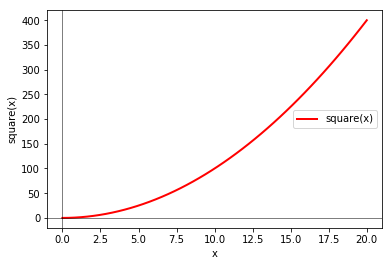

ValueError: Shape must be rank 0 but is rank 2 for 'dense_34/cond/Switch' (op: 'Switch') with input shapes: [?,2], [?,2].

In [20]:
%matplotlib inline

# import tensorflow
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

# define activation functions - ReLU and Parametric ReLU
def ReLU(x):
    #return x if x > 0 else 0
    if x is not None:
        return tf.cond(tf.convert_to_tensor(x > 0, dtype=bool), lambda: tf.convert_to_tensor(x, dtype=float), lambda: tf.convert_to_tensor(0, dtype=float))
        #if x > 0:
        #    return tf.convert_to_tensor(x, dtype=tf.float)
        #else:
        #    return tf.convert_to_tensor(0, dtype=tf.float)
    #return tf.convert_to_tensor(x if x > 0 else 0, dtype=float)

def PReLU(x, alpha):
    ##result = tf.cond(x < y, lambda: tf.add(x, z), lambda: tf.square(y))

    if x is not None and alpha is not None:
        if x < 0:
            return tf.convert_to_tensor(tf.mul(alpha * x), dtype=tf.float)
        else:
            return ReLU(x)
    #return alpha * x if x < 0 else ReLU(x)

def PReLU2(x):
    alpha = tf.convert_to_tensor(0.3, dtype=float)
    if x is not None:
        cond = tf.math.greater(tf.convert_to_tensor(0, dtype=tf.float32), tf.convert_to_tensor(x, dtype=tf.float32))
        return tf.cond(tf.equal(cond, tf.constant(True)), lambda: tf.mul(alpha,x), lambda: x)

    
# setup training data
input_x = np.array(
    [0, 0.5,  1,   1.5, 2,  2.5, 3,   3.5,  4,  4.5 ,  5,  5.5 ,  6,  6.5 ,  7,  7.5 ,  8,  8.5 ,  9,  9.5 , 10 ],
    dtype=float)
output_square_x = np.array(
    [0, 0.25,  1, 2.25, 4, 6.25, 9, 12.25, 16, 20.25, 25, 30.25, 36, 42.25, 49, 56.25, 64, 72.25, 81, 90.25, 100],
    dtype=float)

# print the training data
for i,c in enumerate(input_x):
  print("Square of {} = {}".format(c, output_square_x[i]))
    
# plot square(x)
xvalues = np.linspace(0, 20)
yvalues_input = np.square(xvalues)
plt.plot(xvalues, yvalues_input, lw=2, color='red',
label='square(x)')
plt.xlabel('x')
plt.ylabel('square(x)')
plt.axhline(0, lw=0.5, color='black')
plt.axvline(0, lw=0.5, color='black')
plt.legend()
plt.show()

# build ml model
#l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
l0 = tf.keras.layers.Dense(units=2, input_shape=[1], activation=PReLU2)  
l1 = tf.keras.layers.Dense(units=1, input_shape=[2], activation=PReLU2)  
#l2 = tf.keras.layers.Dense(units=1, input_shape=[1], activation=tf.nn.relu)  
model = tf.keras.Sequential([l0, l1])

model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

print("Start training the model")
history = model.fit(input_x, output_square_x, epochs=500, verbose=False)
print("Finished training the model")

# plot ml model with predictions and function square(x)
xvalues = np.linspace(0, 40)
yvalues_input = np.square(xvalues)

# Auto generate x number value list by range function.
xvalues_prediction = list(range(0, 40))

# Y axis value is assigned by x**3 - TODO replace this with model predictions
yvalues_output = [model.predict([x]) for x in xvalues_prediction]

# Draw points based on above x, y value list and remove the point black outline. And the point color is green.
plt.scatter(xvalues_prediction, yvalues_output, s=3, edgecolors='none', c='blue')

plt.plot(xvalues, yvalues_input, lw=2, color='red', label='square(x)')
plt.xlabel('x')
plt.ylabel('square(x), predicted square(x)')
plt.axhline(0, lw=0.5, color='black')
plt.axvline(0, lw=0.5, color='black')
plt.legend()
plt.show()


